In [1]:
import matplotlib.pyplot as plt
from h5 import HDFArchive

# HDF5 ファイルから MaxEnt 結果と omega を読み込む
with HDFArchive("results_maxent.h5", "r") as ar:
    results_latt_orb = {}
    for key in ar.keys():
        data_dict = ar[key]
        result_data = data_dict["data"]
        result_data.omega = data_dict["omega"]  # omega も復元
        results_latt_orb[key] = result_data

/home/yamamoto/apps/triqs/triqs.build/lib/python3.10/site-packages/h5/archive.py:232: UserWarning: The hdf5 format MaxEntResultData is not recognized. Returning as a group. Did you forgot to import this python class ?
  warnings.warn(f"The hdf5 format {hdf5_format} is not recognized. Returning as a group. Did you forgot to import this python class ?")


In [2]:
import numpy as np

aomega = []
for i in range(13):
    aomega.append(
        np.array(
            results_latt_orb[f"up_{i}"]["analyzer_results"]["LineFitAnalyzer"]["A_out"]
        )
    )
dz2 = aomega[1]
dx2y2 = aomega[0]
t2g = aomega[2] + aomega[3] + aomega[4]
op = aomega[7] + aomega[8] + aomega[9] + aomega[10] + aomega[11] + aomega[12]
nd = aomega[5] + aomega[6]

/home/yamamoto/apps/triqs/triqs.build/lib/python3.10/site-packages/h5/archive.py:232: UserWarning: The hdf5 format AnalyzerResult is not recognized. Returning as a group. Did you forgot to import this python class ?
  warnings.warn(f"The hdf5 format {hdf5_format} is not recognized. Returning as a group. Did you forgot to import this python class ?")


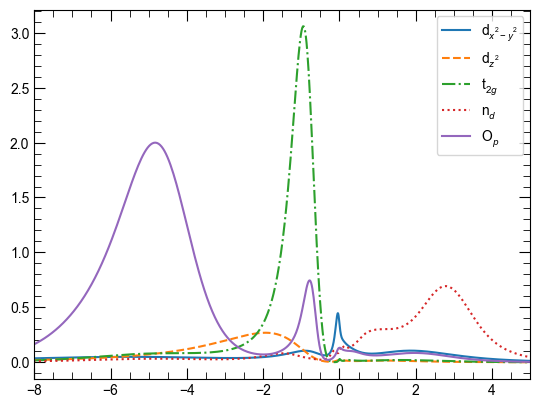

In [3]:
linestyles = ["-", "--", "-.", ":", "-", "--"]
fig, ax = plt.subplots()
ax.plot(
    results_latt_orb[f"up_0"]["omega"],
    dx2y2,
    label="d$_{x^2-y^2}$",
    linestyle=linestyles[0],
)
ax.plot(
    results_latt_orb[f"up_1"]["omega"], dz2, label="d$_{z^2}$", linestyle=linestyles[1]
)
ax.plot(
    results_latt_orb[f"up_2"]["omega"], t2g, label="t$_{2g}$", linestyle=linestyles[2]
)
ax.plot(results_latt_orb[f"up_5"]["omega"], nd, label="n$_d$", linestyle=linestyles[3])
ax.plot(results_latt_orb[f"up_7"]["omega"], op, label="O$_p$", linestyle=linestyles[4])
ax.set_xlim([-8, 5])
ax.legend()